# Intro to Coding for Our Purposes

## Written by A. Baskind on 23 June 2025 for Holly Berg

# STEP 1: Import all necessary software packages

So generally, I copy-paste the same code block importing all my packages to each code. The ones I have included here should likely be sufficient. To run a code block, press SHIFT + RETURN.

In [6]:
# Basic packages
import numpy as np
from matplotlib import pyplot as plt
import xarray as xr
import pandas as pd
import math

# DateTime packages
from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta
import time
import matplotlib.dates as mdates

# Ocean packages
import PyCO2SYS as pyco2
import gsw

# Stats packages
import scipy
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# Logistical packages
import requests
from importlib import reload
import warnings
warnings.filterwarnings('ignore')

# STEP 2: Read in data

The data we read into the code will come in a few different forms. Usually, the data will either be a CSV. 

## File type: CSV
"CSV" stands for "comma separated values." This kind of data file is like a dumb version of an Excel file. Excel files can easily be exported to CSV, and they should be because Excel files don't play nicely in Python but CSVs play very nicely. To open a CSV, you will use the `pandas` software package. You will see in the code block where I imported software packages, I imported pandas as `pd`. You can import any package as any name, but the names I use are commonly used amongst Python coders. 

To open a CSV using `pandas` you will use the function `read_csv()`, which you can read more about [here](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). For example, you can read in a CSV file as follows. `ds` in this instance is the name of the variable that stores all the info in your data file. You can replace `ds` (which is short for dataset) with anything you want to call the variable.

```python
PATH = '/Users/YourLaptop/AFolder/InYourComputer/NameofYourFile.csv'
ds = pd.read_csv(PATH)
```

After you read in the CSV, there are likely a lot of things you need to do to the data that has been read in to make it easy to use. We will ignore this for now, since we need to focus on a much more difficult file type. But you can find all info on this through the [pandas documentation](https://pandas.pydata.org/docs/index.html).

## File type: NetCDF
NetCDF files are simultaneously the best file type and the worst file type. Without the necessary software, they are impossible to read. However, `xarray` which I have imported as `xr` makes it easy. You can see the xarray documentation [here](https://docs.xarray.dev/en/stable/).

To open your NetCDF file, you will use the function [`open_mfdataset()`](https://docs.xarray.dev/en/stable/generated/xarray.open_mfdataset.html#xarray.open_mfdataset). There is a related function called `open_dataset()` that doesn't work as well, so be sure to use `open_mfdataset`. Use it as follows:

```python
PATH = '/Users/YourLaptop/AFolder/InYourComputer/NameofYourFile.nc'
df = xr.open_mfdataset(PATH)
```

## Other file types
You may encounter other files types, like TSVs ("tab separated variables") or plain text files (i.e. file extension of ".txt"). Personally, I never figured out how to read these files directly into Python, but they can be easily imported into an Excel spreadsheet and exported as a friendlier file type, like a CSV.

## Let's try reading in a file!

To get a bit of practice, let's read in one of the model's station files. Each run of the model will output a station file as a NetCDF. This is one of the files we will look at most often, so let's get familiar. 

In [44]:
# The PATH is essentially the location of the file you are interested in opening.
# Your PATH will be different from my PATH, but it will take a similar form.
PATH = '/Users/akbaskind/Desktop/ROMS_Code_Feb2025/ocean_sta_2005_CTRL5.nc'

# Open the dataset
df = xr.open_mfdataset(PATH)

# Selecting only a subset of the stations to make the file a bit smaller
# and only selecting the surface
sta_nos = np.asarray([51,54,55,57,58,8])
sta_names = np.asarray(['BR', 'MV', 'QP', 'TW', 'GB', 'GD'])
df = df.isel(station = sta_nos, s_rho = 9)

# Just writing the variable name at the end of the code block
# and running the code block should display the variable
df

<xarray.Dataset>
Dimensions:             (tracer: 17, boundary: 4, nspc: 3, s_w: 11, station: 6, ocean_time: 17521)
Coordinates:
    s_rho               float64 -0.05
  * s_w                 (s_w) float64 -1.0 -0.9 -0.8 -0.7 ... -0.3 -0.2 -0.1 0.0
    lon_rho             (station) float64 dask.array<chunksize=(6,), meta=np.ndarray>
    lat_rho             (station) float64 dask.array<chunksize=(6,), meta=np.ndarray>
  * ocean_time          (ocean_time) datetime64[ns] 2005-01-01 ... 2006-01-01
Dimensions without coordinates: tracer, boundary, nspc, station
Data variables: (12/212)
    ntimes              int32 ...
    ndtfast             int32 ...
    dt                  float64 ...
    dtfast              float64 ...
    dstart              datetime64[ns] ...
    shuffle             int32 ...
    ...                  ...
    benthic_flux_NH4    (ocean_time, station) float32 dask.array<chunksize=(17521, 6), meta=np.ndarray>
    benthic_flux_PO4    (ocean_time, station) float32 dask.array<chunksize=(17521, 6), meta=np.ndarray>
    benthic_flux_Si     (ocean_time, station) float32 dask.array<chunksize=(17521, 6), meta=np.ndarray>
    SOD                 (ocean_time, station) float32 dask.array<chunksize=(17521, 6), meta=np.ndarray>
    benthic_flux_TIC    (ocean_time, station) float32 dask.array<chunksize=(17521, 6), meta=np.ndarray>
    benthic_flux_Alk    (ocean_time, station) float32 dask.array<chunksize=(17521, 6), meta=np.ndarray>
Attributes: (12/35)
    file:              /project/pi_dullman_uri_edu/abby/ocean_sta_2005_ctrl5.nc
    format:            netCDF-4/HDF5 file
    Conventions:       CF-1.4
    type:              ROMS/TOMS station file
    title:             OSOM-CoSINE15-sedbio-grid5-mod11_10level_v2-2005
    rst_file:          /project/pi_dullman_uri_edu/abby/ocean_rst_2005_ctrl5.nc
    ...                ...
    compiler_flags:    -frepack-arrays -fallow-argument-mismatch -fallow-inva...
    tiling:            015x015
    history:           ROMS/TOMS, Version 3.7, Saturday - March 1, 2025 -  2:...
    ana_file:          ROMS/Functionals/ana_btflux.h, ROMS/Functionals/ana_st...
    bio_file:          ------------------------------------------------------...
    CPP_options:       epscor_umaine15_sedbio_optics_zenith_diag_phyres, ADD_...

# STEP 3: Peek Inside the Data

So you can see above that our datafile `df` has many different qualities. First, it has MANY dimensions. Not all of the dimensions are important. For our station files, the important dimensions are:

* `s_rho`: Depth levels, of which there are 10. `0` corresponds to the bottom and `9` corresponds to the surface.
* `station`: station locations. See [this list](https://docs.google.com/spreadsheets/d/12iH6WadGwf8RTcNd4A_hWWrVMeDiTz8X/edit?usp=drive_link&ouid=100076931398295024158&rtpof=true&sd=true) of station locations. 
* `ocean_time`: all time steps. Honestly I don't remember how big the time step is, but most station files will have a full year's worth of time steps

You might also see that there are 213 data variables. Not all of the variables are important. Here are some the variables we may be interested in:
* `temp`: temperature
* `salt`: salinity
* `TIC`: total inorganic carbon
* `alkalinity`: alkalinity
* `oxygen`: dissolved oxygen concentration 
* `NO3`: nitrate concentration
* `NH4`: ammonium concentration
* `SiOH4`: silicate concentration
* `diatom`: concentration of large phytoplankton
* `smallphytoplankton`: concentration of small phytoplankton
* `pCO2s`: partial pressure of dissolved CO2 in the surface water

# STEP 4: Do a Calculation

Somewhat frustratingly, the model does not output pH, so we have to calculate it now. We can calculate pH using `TIC`, `alkalinity`, `salt`, and `temp` using [PyCO2SYS](https://pyco2sys.readthedocs.io/en/latest/co2sys_nd/). But there is a hitch: PyCO2SYS likes `TIC` and `alkalinity` in units of µmol kg<sup>-1</sup> but the model outputs `TIC` and `alkalinity` in units of mmol m<sup>-3</sup>, so we have to take great care to convert the units appropriately. Generally, this is the unit conversion:

$$
\frac{mmol}{m^{3}} * [\frac{m^{3}}{kg}]_{density} * \frac{1000 \mu mol}{mmol}
$$

Luckily, I have already written a little function to do this conversion, but before we use the function we do need to calculate density. We can calculate density with the `rho()` function from the `gsw` software package. You can see the documentation [here](https://teos-10.github.io/GSW-Python/density.html). Here is how we will do it:

```python
temperature = df['temp']
salinity = df['salt']
pressure = gsw.p_from_z(df['h']*df['s_rho'], 41)
density = gsw.rho(salinity, temperature, pressure)
```

Note that I did not explain the pressure portion. Honestly, it's not super important right now and half the time you can get away with just using a pressure of 0. But here I am using depth and latitude to calculate the pressure. Don't worry about this too much.

In [8]:
# Helper functio to convert units
# Requires the value to be converted and density to work
def mmolm3_to_umolkg(value, density):
    # Convert from mmol/m3 to mmol/kg
    # mmol/m3 * m3/kg = value / density
    value = value / density
    # Convert mmol to umol
    value = value * 1000
    return value

In [45]:
# Calculate Density
T = df['temp']
S = df['salt']
P = gsw.p_from_z(df['h']*df['s_rho'], 41)
rho = gsw.rho(S, T, P)

# Convert some variables using density
DIC = df['TIC']
DIC = mmolm3_to_umolkg(DIC, rho)
TA = df['alkalinity']
TA = mmolm3_to_umolkg(TA, rho)

Now that we have converted our units, we are ready to calculate pH! Using PyCO2SYS is very confusing at first, but the [documentation](https://pyco2sys.readthedocs.io/en/latest/co2sys_nd/) will explain it much better than I can. So apologies that this will be a terrible explanation of how to use that software. 
 

In [46]:
results = pyco2.sys(par1 = TA, par1_type = 1,
                    par2 = DIC, par2_type = 2, 
                    temperature = T, salinity = S)
print(list(results.key()))

AttributeError: 'dict' object has no attribute 'key'

Notice how the PyCO2SYS software outputs all kinds of results, the names of all these results I have printed above. We will not use all of the results and over time you will become familiar with which results matter to us. For now, let's focus on an output called `pH_NBS

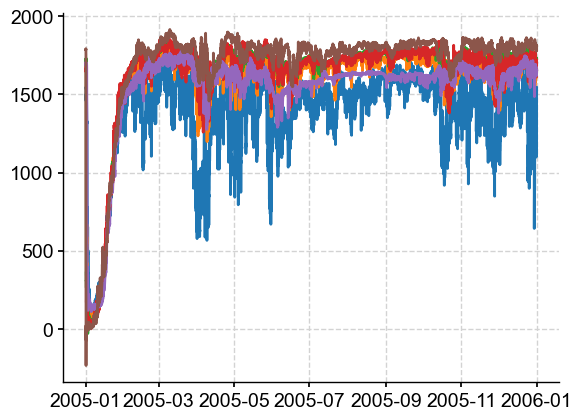

In [36]:
for i in df.station:
    dic = DIC.isel(station = i)
    t = dic.ocean_time
    plt.plot(t, dic)

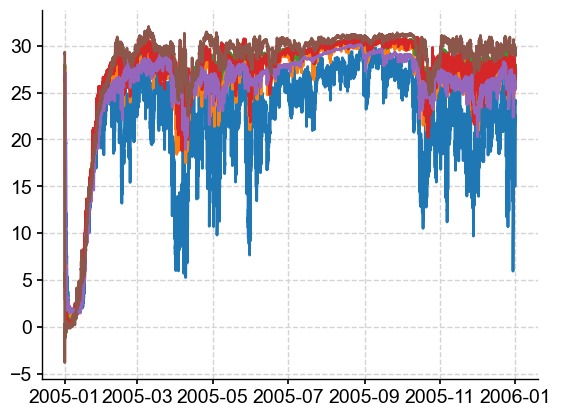

In [43]:
for i in df.station:
    salt = df['salt'].isel(station = i)
    t = salt.ocean_time
    plt.plot(t, salt)

In [39]:
salt.

array([29.171568, 29.18796 , 29.106869, ..., 29.783072, 29.792456,
       29.759224], dtype=float32)